In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('../data/restaurant_data/master.csv', parse_dates=['visit_date'])

In [19]:
df

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0


<AxesSubplot:title={'center':'Visitors Over Time'}, xlabel='visit_date'>

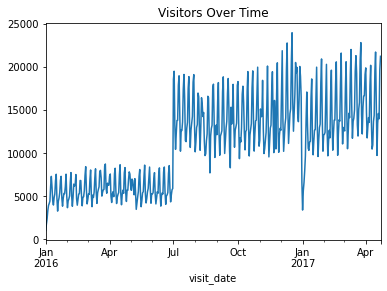

In [21]:
df.groupby('visit_date')['visitors'].sum().plot(title='Visitors Over Time', kind='line')

In [24]:
data = df.groupby('visit_date')['visitors'].sum().reset_index()

In [25]:
data

,visit_date,visitors
0,2016-01-01,1033
1,2016-01-02,1764
2,2016-01-03,2368
3,2016-01-04,3326
4,2016-01-05,3927
...,...,...
473,2017-04-18,13489
474,2017-04-19,14607
475,2017-04-20,13990
476,2017-04-21,19624


In [26]:
px.line(data, x='visit_date', y='visitors', title='Visitors Over Time')

In [30]:
fig = go.Figure()

In [31]:
fig

In [32]:
data

,visit_date,visitors
0,2016-01-01,1033
1,2016-01-02,1764
2,2016-01-03,2368
3,2016-01-04,3326
4,2016-01-05,3927
...,...,...
473,2017-04-18,13489
474,2017-04-19,14607
475,2017-04-20,13990
476,2017-04-21,19624


In [39]:
data2 = df.groupby('visit_date')['reserve_visitors'].sum().reset_index()

In [41]:
?px.line

In [42]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=data['visit_date'], y=data['visitors'], name = 'Visitors')
)

fig.add_trace(
    go.Scatter(x=data2['visit_date'], y=data2['reserve_visitors'], name = 'Reservations')
)

fig.update_layout(
    title = 'Reservations + Visitors Overtime'
)

In [43]:
data3 = df.groupby(['visit_date', 'area'])['visitors'].sum().reset_index()
px.line(data3, x='visit_date', y='visitors', facet_row='area',
        title='Restaurant Attendance Broken Down by Area', height=2000
    )

ValueError: Vertical spacing cannot be greater than (1 / (rows - 1)) = 0.009804.
The resulting plot would have 103 rows (rows=103).
Use the facet_row_spacing argument to adjust this spacing.